In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from maf import MAF
from made import MADE
from datasets.data_loaders import get_data, get_data_loaders
from utils.train import train_one_epoch_maf, train_one_epoch_made
from utils.validation import val_maf, val_made
from utils.test import test_maf, test_made
from utils.plot import sample_digits_maf, plot_losses

from tqdm import tqdm

In [2]:
# --------- SET PARAMETERS ----------
model_name = "maf"  # 'MAF' or 'MADE'
dataset_name = "chad"
batch_size = 1000
n_mades = 1
hidden_dims = [1]
lr = 1e-6
random_order = False
patience = 30  # For early stopping
seed = 290713
plot = False
max_epochs = 5000
# -----------------------------------

In [3]:
# Get dataset.
data = get_data(dataset_name)
train = torch.from_numpy(data.train.x)

In [4]:
dimdat = train.shape[1]
print('Each input vector is of length',dimdat)
print('There are',train.shape[0],'data vectors')

Each input vector is of length 2
There are 8100 data vectors


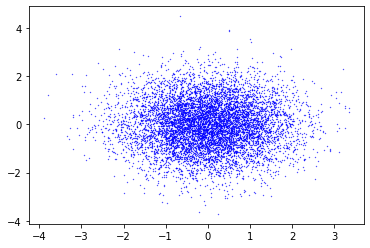

In [5]:
plt.scatter(torch.detach(train[:,0]), torch.detach(train[:,1]), c ="blue", s=0.1)
plt.show()

In [6]:
# Get data loaders.
train_loader, val_loader, test_loader = get_data_loaders(data, batch_size)

In [7]:
# Get model.
n_in = data.n_dims
n_in = train.shape[1]
if model_name.lower() == "maf":
    model = MAF(n_in, n_mades, hidden_dims, use_reverse=False)
elif model_name.lower() == "made":
    model = MADE(n_in, hidden_dims, random_order=random_order, seed=seed, gaussian=True)

In [8]:
# Get optimiser.
optimiser = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-6)

In [9]:
# Format name of model save file.
save_name = f"{model_name}_{dataset_name}_{'_'.join(str(d) for d in hidden_dims)}.pt"

In [10]:
# Initialise list for plotting.
epochs_list = []
train_losses = []
val_losses = []

In [11]:
# Initialiise early stopping.
i = 0
max_loss = np.inf

In [12]:
# Training loop.
for epoch in tqdm(range(1, max_epochs)):
    if model_name == "maf":
        train_loss = train_one_epoch_maf(model, epoch, optimiser, train_loader)
        val_loss = val_maf(model, train, val_loader)
    elif model_name == "made":
        train_loss = train_one_epoch_made(model, epoch, optimiser, train_loader)
        val_loss = val_made(model, val_loader)
    if plot:
        sample_digits_maf(model, epoch, random_order=random_order, seed=5)

    epochs_list.append(epoch)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping. Save model on each epoch with improvement.
    if val_loss < max_loss:
        i = 0
        max_loss = val_loss
        torch.save(
            model, "model_saves/" + save_name
        )  # Will print a UserWarning 1st epoch.
    else:
        i += 1

    if i < patience:
        print("Patience counter: {}/{}".format(i, patience))
    else:
        print("Patience counter: {}/{}\n Terminate training!".format(i, patience))
        break

  0%|                                                                                                                    | 1/4999 [00:00<09:28,  8.80it/s]

Parameter containing:
tensor([[0., 0.]], requires_grad=True)
Parameter containing:
tensor([[9.9999e-07, 9.9999e-07]], requires_grad=True)
Parameter containing:
tensor([[1.9999e-06, 1.9999e-06]], requires_grad=True)
Parameter containing:
tensor([[2.9997e-06, 2.9998e-06]], requires_grad=True)
Parameter containing:
tensor([[3.9994e-06, 3.9995e-06]], requires_grad=True)
Parameter containing:
tensor([[4.9989e-06, 4.9991e-06]], requires_grad=True)
Parameter containing:
tensor([[5.9982e-06, 5.9986e-06]], requires_grad=True)
Parameter containing:
tensor([[6.9973e-06, 6.9978e-06]], requires_grad=True)
Parameter containing:
tensor([[7.9961e-06, 7.9968e-06]], requires_grad=True)
HERE
Epoch: 1 Average loss: 2.88024
setting batch stats for validation
Parameter containing:
tensor([[8.7081e-06, 8.7091e-06]], requires_grad=True)
Parameter containing:
tensor([[8.7081e-06, 8.7091e-06]], requires_grad=True)
Validation loss: 2.8885 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[8.7081e-0

  0%|▎                                                                                                                  | 11/4999 [00:00<02:24, 34.48it/s]

Parameter containing:
tensor([[3.1788e-05, 3.1800e-05]], requires_grad=True)
Parameter containing:
tensor([[3.2393e-05, 3.2405e-05]], requires_grad=True)
Parameter containing:
tensor([[3.2970e-05, 3.2982e-05]], requires_grad=True)
Parameter containing:
tensor([[3.3524e-05, 3.3536e-05]], requires_grad=True)
Parameter containing:
tensor([[3.4055e-05, 3.4068e-05]], requires_grad=True)
Parameter containing:
tensor([[3.4567e-05, 3.4580e-05]], requires_grad=True)
Parameter containing:
tensor([[3.5061e-05, 3.5074e-05]], requires_grad=True)
HERE
Epoch: 6 Average loss: 2.88021
setting batch stats for validation
Parameter containing:
tensor([[3.5762e-05, 3.5775e-05]], requires_grad=True)
Parameter containing:
tensor([[3.5762e-05, 3.5775e-05]], requires_grad=True)
Validation loss: 2.8885 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[3.5762e-05, 3.5775e-05]], requires_grad=True)
Parameter containing:
tensor([[3.6425e-05, 3.6439e-05]], requires_grad=True)
Parameter containing:
te

  0%|▍                                                                                                                  | 21/4999 [00:00<02:05, 39.66it/s]

Parameter containing:
tensor([[7.4942e-05, 7.4975e-05]], requires_grad=True)
Parameter containing:
tensor([[7.5414e-05, 7.5447e-05]], requires_grad=True)
Parameter containing:
tensor([[7.5867e-05, 7.5899e-05]], requires_grad=True)
HERE
Epoch: 14 Average loss: 2.88016
setting batch stats for validation
Parameter containing:
tensor([[7.6549e-05, 7.6582e-05]], requires_grad=True)
Parameter containing:
tensor([[7.6549e-05, 7.6582e-05]], requires_grad=True)
Validation loss: 2.8884 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[7.6549e-05, 7.6582e-05]], requires_grad=True)
Parameter containing:
tensor([[7.7190e-05, 7.7223e-05]], requires_grad=True)
Parameter containing:
tensor([[7.7794e-05, 7.7828e-05]], requires_grad=True)
Parameter containing:
tensor([[7.8366e-05, 7.8400e-05]], requires_grad=True)
Parameter containing:
tensor([[7.8907e-05, 7.8941e-05]], requires_grad=True)
Parameter containing:
tensor([[7.9422e-05, 7.9456e-05]], requires_grad=True)
Parameter containing:
t

  1%|▌                                                                                                                  | 26/4999 [00:00<02:03, 40.37it/s]

Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
HERE
Epoch: 23 Average loss: 2.88011
setting batch stats for validation
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Validation loss: 2.8884 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0001]], requires_grad=True)
Parameter containing:
tensor([[0.0001, 0.0

  1%|▊                                                                                                                  | 36/4999 [00:00<01:59, 41.60it/s]

Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
HERE
Epoch: 31 Average loss: 2.88006
setting batch stats for validation
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Validation loss: 2.8883 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
HERE
Epoch: 32 Average loss: 2.88006
setti

  1%|█                                                                                                                  | 46/4999 [00:01<01:57, 42.10it/s]

Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
HERE
Epoch: 40 Average loss: 2.88001
setting batch stats for validation
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Validation loss: 2.8883 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0

  1%|█▎                                                                                                                 | 56/4999 [00:01<01:56, 42.27it/s]

Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Validation loss: 2.8882 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
HERE
Epoch: 49 Average loss: 2.87996
setting batch stats for validation
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Parameter containing:
tensor([[0.0002, 0.0002]], requires_grad=True)
Validation loss: 2.8882 +/- 0.0671
Patienc

  1%|█▍                                                                                                                 | 61/4999 [00:01<01:56, 42.50it/s]

Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
HERE
Epoch: 57 Average loss: 2.87991
setting batch stats for validation
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Validation loss: 2.8881 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0

  1%|█▋                                                                                                                 | 71/4999 [00:01<01:55, 42.70it/s]

Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
HERE
Epoch: 66 Average loss: 2.87986
setting batch stats for validation
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Validation loss: 2.8881 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0

  2%|█▊                                                                                                                 | 81/4999 [00:02<02:01, 40.59it/s]

Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
HERE
Epoch: 74 Average loss: 2.87982
setting batch stats for validation
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Validation loss: 2.8880 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
Parameter containing:
tensor([[0.0003, 0.0003]], requires_grad=True)
HERE
Epoch: 75 Average loss: 2.87981
setti

  2%|█▉                                                                                                                 | 86/4999 [00:02<02:00, 40.92it/s]

Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
HERE
Epoch: 82 Average loss: 2.87977
setting batch stats for validation
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Validation loss: 2.8880 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0

  2%|██▏                                                                                                                | 96/4999 [00:02<01:57, 41.81it/s]

Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
HERE
Epoch: 90 Average loss: 2.87972
setting batch stats for validation
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Validation loss: 2.8880 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0

  2%|██▍                                                                                                               | 106/4999 [00:02<01:56, 42.00it/s]

Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
HERE
Epoch: 99 Average loss: 2.87967
setting batch stats for validation
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Validation loss: 2.8879 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0

  2%|██▌                                                                                                               | 111/4999 [00:02<01:55, 42.18it/s]

Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
HERE
Epoch: 107 Average loss: 2.87963
setting batch stats for validation
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Validation loss: 2.8878 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)
Parameter containing:
tensor([[0.0004, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.

  2%|██▊                                                                                                               | 121/4999 [00:02<01:54, 42.52it/s]

Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
HERE
Epoch: 116 Average loss: 2.87957
setting batch stats for validation
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Validation loss: 2.8878 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.

  3%|██▉                                                                                                               | 131/4999 [00:03<01:54, 42.40it/s]

Patience counter: 0/30
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
HERE
Epoch: 125 Average loss: 2.87952
setting batch stats for validation
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Validation loss: 2.8877 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containi

  3%|███▏                                                                                                              | 141/4999 [00:03<01:54, 42.50it/s]

Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
HERE
Epoch: 133 Average loss: 2.87948
setting batch stats for validation
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Validation loss: 2.8877 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.

  3%|███▎                                                                                                              | 146/4999 [00:03<01:53, 42.87it/s]

Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0005]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0005, 0.0006]], requires_grad=True)
HERE
Epoch: 142 Average loss: 2.87942
setting batch stats for validation
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Validation loss: 2.8876 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.

  3%|███▌                                                                                                              | 156/4999 [00:03<01:50, 43.72it/s]

Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
HERE
Epoch: 151 Average loss: 2.87937
setting batch stats for validation
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Validation loss: 2.8876 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.

  3%|███▊                                                                                                              | 166/4999 [00:03<01:48, 44.70it/s]

Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
HERE
Epoch: 160 Average loss: 2.87932
setting batch stats for validation
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Validation loss: 2.8875 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.

  4%|████                                                                                                              | 176/4999 [00:04<01:55, 41.78it/s]

Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
HERE
Epoch: 169 Average loss: 2.87927
setting batch stats for validation
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Validation loss: 2.8875 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.

  4%|████▏                                                                                                             | 181/4999 [00:04<01:54, 41.97it/s]

Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
HERE
Epoch: 177 Average loss: 2.87922
setting batch stats for validation
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Validation loss: 2.8874 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0006, 0.0006]], requires_grad=True)
Parameter containing:
tensor([[0.0006, 0.

  4%|████▎                                                                                                             | 191/4999 [00:04<01:52, 42.59it/s]

Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
HERE
Epoch: 185 Average loss: 2.87918
setting batch stats for validation
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Validation loss: 2.8874 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.

  4%|████▌                                                                                                             | 201/4999 [00:04<01:51, 43.09it/s]

Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
HERE
Epoch: 194 Average loss: 2.87913
setting batch stats for validation
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Validation loss: 2.8873 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.

  4%|████▋                                                                                                             | 206/4999 [00:04<01:51, 42.83it/s]

Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
HERE
Epoch: 203 Average loss: 2.87907
setting batch stats for validation
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Validation loss: 2.8873 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.

  4%|████▉                                                                                                             | 216/4999 [00:05<01:49, 43.57it/s]

Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
HERE
Epoch: 211 Average loss: 2.87903
setting batch stats for validation
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Validation loss: 2.8872 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.

  5%|█████▏                                                                                                            | 226/4999 [00:05<01:47, 44.51it/s]

Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Validation loss: 2.8872 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
HERE
Epoch: 221 Average loss: 2.87897
setting batch stats for validation
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.

  5%|█████▍                                                                                                            | 236/4999 [00:05<01:49, 43.44it/s]

Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
HERE
Epoch: 229 Average loss: 2.87893
setting batch stats for validation
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Validation loss: 2.8871 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.

  5%|█████▍                                                                                                            | 241/4999 [00:05<01:50, 42.94it/s]

Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
HERE
Epoch: 238 Average loss: 2.87887
setting batch stats for validation
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Validation loss: 2.8871 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.0007]], requires_grad=True)
Parameter containing:
tensor([[0.0007, 0.

  5%|█████▋                                                                                                            | 251/4999 [00:05<01:50, 42.82it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 246 Average loss: 2.87883
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8870 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  5%|█████▉                                                                                                            | 261/4999 [00:06<01:47, 44.26it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 255 Average loss: 2.87878
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8870 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  5%|██████▏                                                                                                           | 271/4999 [00:06<01:48, 43.62it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 264 Average loss: 2.87873
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8869 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  6%|██████▎                                                                                                           | 276/4999 [00:06<01:58, 39.91it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 273 Average loss: 2.87867
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8869 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  6%|██████▌                                                                                                           | 286/4999 [00:06<01:54, 41.25it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 280 Average loss: 2.87863
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8868 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  6%|██████▊                                                                                                           | 296/4999 [00:07<01:51, 42.10it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 289 Average loss: 2.87858
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8868 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  6%|██████▊                                                                                                           | 301/4999 [00:07<01:51, 42.11it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 297 Average loss: 2.87854
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8867 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  6%|███████                                                                                                           | 311/4999 [00:07<01:48, 43.02it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 306 Average loss: 2.87849
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8867 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  6%|███████▎                                                                                                          | 321/4999 [00:07<01:45, 44.43it/s]

Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
HERE
Epoch: 315 Average loss: 2.87844
setting batch stats for validation
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Validation loss: 2.8866 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.0008]], requires_grad=True)
Parameter containing:
tensor([[0.0008, 0.

  7%|███████▌                                                                                                          | 331/4999 [00:07<01:45, 44.36it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 324 Average loss: 2.87838
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8866 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  7%|███████▊                                                                                                          | 341/4999 [00:08<01:45, 43.96it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 333 Average loss: 2.87833
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8865 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  7%|███████▉                                                                                                          | 346/4999 [00:08<01:46, 43.50it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 342 Average loss: 2.87828
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8865 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  7%|████████                                                                                                          | 356/4999 [00:08<01:47, 43.08it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 350 Average loss: 2.87824
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8864 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  7%|████████▎                                                                                                         | 366/4999 [00:08<01:48, 42.73it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 359 Average loss: 2.87819
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8864 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  7%|████████▍                                                                                                         | 371/4999 [00:08<01:48, 42.66it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 367 Average loss: 2.87814
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8863 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 368 Average loss: 2.87814
set

  8%|████████▋                                                                                                         | 381/4999 [00:09<01:53, 40.73it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 375 Average loss: 2.87810
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8863 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  8%|████████▉                                                                                                         | 391/4999 [00:09<01:47, 42.88it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 384 Average loss: 2.87804
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8862 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  8%|█████████▏                                                                                                        | 401/4999 [00:09<01:43, 44.54it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 393 Average loss: 2.87799
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8862 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 394 Average loss: 2.87799
set

  8%|█████████▎                                                                                                        | 411/4999 [00:09<01:40, 45.67it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 403 Average loss: 2.87794
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8861 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  8%|█████████▍                                                                                                        | 416/4999 [00:09<01:39, 46.05it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 412 Average loss: 2.87789
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8860 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  9%|█████████▋                                                                                                        | 426/4999 [00:10<01:38, 46.55it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 422 Average loss: 2.87783
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8860 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  9%|█████████▉                                                                                                        | 436/4999 [00:10<01:38, 46.54it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 431 Average loss: 2.87778
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8859 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  9%|██████████▏                                                                                                       | 446/4999 [00:10<01:37, 46.87it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8859 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 441 Average loss: 2.87772
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8859 +/- 0.0672
Patien

  9%|██████████▍                                                                                                       | 456/4999 [00:10<01:36, 47.03it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 450 Average loss: 2.87767
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8858 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

  9%|██████████▋                                                                                                       | 466/4999 [00:10<01:36, 47.11it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8858 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 460 Average loss: 2.87762
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8858 +/- 0.0672
Patien

 10%|██████████▊                                                                                                       | 476/4999 [00:11<01:43, 43.64it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 469 Average loss: 2.87757
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8857 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

 10%|██████████▉                                                                                                       | 481/4999 [00:11<01:41, 44.32it/s]

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
HERE
Epoch: 477 Average loss: 2.87752
setting batch stats for validation
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Validation loss: 2.8857 +/- 0.0672
Patience counter: 0/30
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0.0009, 0.

 10%|███████████▏                                                                                                      | 491/4999 [00:11<02:30, 29.99it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 485 Average loss: 2.87747
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8856 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 10%|███████████▍                                                                                                      | 501/4999 [00:11<02:07, 35.41it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 494 Average loss: 2.87742
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8856 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 10%|███████████▌                                                                                                      | 506/4999 [00:12<02:00, 37.29it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 502 Average loss: 2.87738
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8855 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 503 Average loss: 2.87737
set

 10%|███████████▊                                                                                                      | 516/4999 [00:12<01:52, 39.88it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 511 Average loss: 2.87733
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8855 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 11%|███████████▉                                                                                                      | 526/4999 [00:12<01:45, 42.41it/s]

Validation loss: 2.8854 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 520 Average loss: 2.87728
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8854 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], req

 11%|████████████▏                                                                                                     | 536/4999 [00:12<01:39, 44.75it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 529 Average loss: 2.87723
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8854 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 11%|████████████▍                                                                                                     | 546/4999 [00:12<01:37, 45.85it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 538 Average loss: 2.87718
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8853 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 11%|████████████▋                                                                                                     | 556/4999 [00:13<01:35, 46.76it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 548 Average loss: 2.87712
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8853 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 11%|████████████▉                                                                                                     | 566/4999 [00:13<01:34, 47.10it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 557 Average loss: 2.87707
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8852 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 11%|█████████████                                                                                                     | 571/4999 [00:13<01:33, 47.16it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 567 Average loss: 2.87701
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8851 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 12%|█████████████▏                                                                                                    | 581/4999 [00:13<01:38, 44.70it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 576 Average loss: 2.87696
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8851 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 12%|█████████████▍                                                                                                    | 591/4999 [00:13<01:38, 44.85it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 585 Average loss: 2.87691
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8850 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 12%|█████████████▋                                                                                                    | 601/4999 [00:14<01:37, 45.23it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 594 Average loss: 2.87686
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8850 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 12%|█████████████▊                                                                                                    | 606/4999 [00:14<01:40, 43.65it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 603 Average loss: 2.87681
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8849 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 12%|██████████████                                                                                                    | 616/4999 [00:14<01:41, 43.24it/s]

setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8849 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 612 Average loss: 2.87676
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parame

 13%|██████████████▎                                                                                                   | 626/4999 [00:14<01:39, 44.12it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 620 Average loss: 2.87672
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8848 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 13%|██████████████▌                                                                                                   | 636/4999 [00:14<01:36, 45.11it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8848 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 630 Average loss: 2.87666
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 13%|██████████████▋                                                                                                   | 646/4999 [00:15<01:34, 46.16it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 639 Average loss: 2.87661
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8847 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 13%|██████████████▉                                                                                                   | 656/4999 [00:15<01:33, 46.70it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 648 Average loss: 2.87656
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8847 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 13%|███████████████▏                                                                                                  | 666/4999 [00:15<01:32, 47.10it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 658 Average loss: 2.87651
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8846 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 13%|███████████████▎                                                                                                  | 671/4999 [00:15<01:31, 47.34it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 667 Average loss: 2.87646
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8846 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 668 Average loss: 2.87645
set

 14%|███████████████▌                                                                                                  | 681/4999 [00:15<01:37, 44.49it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 676 Average loss: 2.87641
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8845 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 14%|███████████████▊                                                                                                  | 691/4999 [00:16<01:34, 45.81it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 685 Average loss: 2.87636
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8845 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 14%|███████████████▉                                                                                                  | 701/4999 [00:16<01:33, 45.93it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 695 Average loss: 2.87630
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8844 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 14%|████████████████▏                                                                                                 | 711/4999 [00:16<01:33, 46.07it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 704 Average loss: 2.87625
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8844 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 14%|████████████████▍                                                                                                 | 721/4999 [00:16<01:31, 46.66it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 713 Average loss: 2.87620
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8843 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 15%|████████████████▋                                                                                                 | 731/4999 [00:16<01:30, 47.08it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 723 Average loss: 2.87615
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8842 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 15%|████████████████▉                                                                                                 | 741/4999 [00:17<01:30, 47.28it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 732 Average loss: 2.87610
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8842 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 15%|█████████████████                                                                                                 | 746/4999 [00:17<01:29, 47.32it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 742 Average loss: 2.87604
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8841 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 15%|█████████████████▏                                                                                                | 756/4999 [00:17<01:29, 47.23it/s]

HERE
Epoch: 751 Average loss: 2.87599
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8841 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 752 Average loss: 2.87599
setting batch stats for validation
Parameter containing:
tensor([[0.0010

 15%|█████████████████▍                                                                                                | 766/4999 [00:17<01:29, 47.14it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 761 Average loss: 2.87594
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8840 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 16%|█████████████████▋                                                                                                | 776/4999 [00:17<01:36, 43.79it/s]

setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8840 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 771 Average loss: 2.87588
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parame

 16%|█████████████████▉                                                                                                | 786/4999 [00:18<01:32, 45.43it/s]

Validation loss: 2.8839 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 779 Average loss: 2.87584
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8839 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], req

 16%|██████████████████▏                                                                                               | 796/4999 [00:18<01:31, 46.16it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 788 Average loss: 2.87579
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8839 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 16%|██████████████████▍                                                                                               | 806/4999 [00:18<01:29, 46.71it/s]

setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8838 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 798 Average loss: 2.87573
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parame

 16%|██████████████████▍                                                                                               | 811/4999 [00:18<01:29, 46.91it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 807 Average loss: 2.87568
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8838 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 16%|██████████████████▋                                                                                               | 821/4999 [00:18<01:29, 46.82it/s]

HERE
Epoch: 816 Average loss: 2.87563
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8837 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 817 Average loss: 2.87563
setting batch stats for validation
Parameter containing:
tensor([[0.0010

 17%|██████████████████▉                                                                                               | 831/4999 [00:19<01:29, 46.82it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 826 Average loss: 2.87558
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8837 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 17%|███████████████████▏                                                                                              | 841/4999 [00:19<01:28, 46.75it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 835 Average loss: 2.87553
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8836 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 17%|███████████████████▍                                                                                              | 851/4999 [00:19<01:28, 46.90it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 845 Average loss: 2.87547
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8836 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 17%|███████████████████▋                                                                                              | 861/4999 [00:19<01:27, 47.17it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 854 Average loss: 2.87542
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8835 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 17%|███████████████████▊                                                                                              | 871/4999 [00:19<01:27, 47.33it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 864 Average loss: 2.87537
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8834 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 18%|███████████████████▉                                                                                              | 876/4999 [00:20<01:34, 43.81it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 873 Average loss: 2.87532
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8834 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 18%|████████████████████▏                                                                                             | 886/4999 [00:20<01:30, 45.44it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 881 Average loss: 2.87527
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8834 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 882 Average loss: 2.87527
set

 18%|████████████████████▍                                                                                             | 896/4999 [00:20<01:28, 46.45it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 891 Average loss: 2.87522
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8833 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 18%|████████████████████▋                                                                                             | 906/4999 [00:20<01:27, 47.03it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8832 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 901 Average loss: 2.87517
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 18%|████████████████████▉                                                                                             | 916/4999 [00:20<01:26, 47.07it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 910 Average loss: 2.87512
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8832 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 19%|█████████████████████                                                                                             | 926/4999 [00:21<01:26, 46.99it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8831 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 920 Average loss: 2.87506
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8831 +/- 0.0671
Patien

 19%|█████████████████████▎                                                                                            | 936/4999 [00:21<01:25, 47.34it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 929 Average loss: 2.87501
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8831 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 19%|█████████████████████▌                                                                                            | 946/4999 [00:21<01:25, 47.43it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8830 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 939 Average loss: 2.87496
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8830 +/- 0.0671
Patien

 19%|█████████████████████▊                                                                                            | 956/4999 [00:21<01:25, 47.22it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 948 Average loss: 2.87491
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8830 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 19%|██████████████████████                                                                                            | 966/4999 [00:22<01:25, 47.27it/s]

Validation loss: 2.8829 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 958 Average loss: 2.87485
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8829 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], req

 19%|██████████████████████▏                                                                                           | 971/4999 [00:22<01:25, 47.10it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 967 Average loss: 2.87480
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8829 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 20%|██████████████████████▎                                                                                           | 981/4999 [00:22<01:30, 44.41it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 976 Average loss: 2.87475
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8828 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 20%|██████████████████████▌                                                                                           | 991/4999 [00:22<01:28, 45.29it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 985 Average loss: 2.87471
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8828 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 20%|██████████████████████▋                                                                                          | 1001/4999 [00:22<01:26, 46.30it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 995 Average loss: 2.87465
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8827 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.

 20%|██████████████████████▊                                                                                          | 1011/4999 [00:22<01:25, 46.87it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1004 Average loss: 2.87460
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8827 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 20%|███████████████████████                                                                                          | 1021/4999 [00:23<01:24, 47.35it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1014 Average loss: 2.87455
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8826 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 21%|███████████████████████▎                                                                                         | 1031/4999 [00:23<01:23, 47.28it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1023 Average loss: 2.87450
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8826 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1024 Average loss: 2.87449
s

 21%|███████████████████████▌                                                                                         | 1041/4999 [00:23<01:23, 47.17it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1033 Average loss: 2.87444
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8825 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 21%|███████████████████████▊                                                                                         | 1051/4999 [00:23<01:23, 47.26it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1042 Average loss: 2.87439
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8824 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 21%|███████████████████████▊                                                                                         | 1056/4999 [00:23<01:23, 47.16it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1052 Average loss: 2.87434
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8824 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 21%|████████████████████████                                                                                         | 1066/4999 [00:24<01:23, 47.13it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1061 Average loss: 2.87429
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8823 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 22%|████████████████████████▎                                                                                        | 1076/4999 [00:24<01:29, 43.92it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1071 Average loss: 2.87424
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8823 +/- 0.0671
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 22%|████████████████████████▌                                                                                        | 1086/4999 [00:24<01:25, 45.77it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1079 Average loss: 2.87419
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8822 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 22%|████████████████████████▊                                                                                        | 1096/4999 [00:24<01:23, 46.59it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1089 Average loss: 2.87414
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8822 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 22%|█████████████████████████                                                                                        | 1106/4999 [00:25<01:22, 47.01it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1098 Average loss: 2.87409
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8821 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 22%|█████████████████████████▏                                                                                       | 1116/4999 [00:25<01:21, 47.40it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1108 Average loss: 2.87403
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8821 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 23%|█████████████████████████▍                                                                                       | 1126/4999 [00:25<01:21, 47.34it/s]

setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8820 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1118 Average loss: 2.87398
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Param

 23%|█████████████████████████▌                                                                                       | 1131/4999 [00:25<01:21, 47.18it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1127 Average loss: 2.87393
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8820 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 23%|█████████████████████████▊                                                                                       | 1141/4999 [00:25<01:21, 47.21it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8819 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1137 Average loss: 2.87387
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 23%|██████████████████████████                                                                                       | 1151/4999 [00:25<01:22, 46.87it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1146 Average loss: 2.87382
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8819 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 23%|██████████████████████████▏                                                                                      | 1161/4999 [00:26<01:21, 47.08it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1155 Average loss: 2.87378
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8818 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1156 Average loss: 2.87377
s

 23%|██████████████████████████▍                                                                                      | 1171/4999 [00:26<01:21, 47.09it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1165 Average loss: 2.87372
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8818 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 24%|██████████████████████████▋                                                                                      | 1181/4999 [00:26<01:25, 44.63it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1174 Average loss: 2.87367
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8817 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 24%|██████████████████████████▉                                                                                      | 1191/4999 [00:26<01:22, 46.02it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8817 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1183 Average loss: 2.87362
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 24%|███████████████████████████                                                                                      | 1196/4999 [00:26<01:23, 45.37it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1192 Average loss: 2.87357
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8816 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 24%|███████████████████████████▎                                                                                     | 1206/4999 [00:27<01:22, 45.91it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1201 Average loss: 2.87352
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8816 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 24%|███████████████████████████▍                                                                                     | 1216/4999 [00:27<01:22, 45.70it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1210 Average loss: 2.87348
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8815 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1211 Average loss: 2.87347
s

 25%|███████████████████████████▋                                                                                     | 1226/4999 [00:27<01:21, 46.29it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8815 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1220 Average loss: 2.87342
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8815 +/- 0.0670
Patie

 25%|███████████████████████████▉                                                                                     | 1236/4999 [00:27<01:22, 45.77it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1229 Average loss: 2.87337
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8814 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 25%|████████████████████████████▏                                                                                    | 1246/4999 [00:28<01:21, 45.93it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1238 Average loss: 2.87332
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8814 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 25%|████████████████████████████▎                                                                                    | 1251/4999 [00:28<01:25, 43.68it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1247 Average loss: 2.87327
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8813 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 25%|████████████████████████████▌                                                                                    | 1261/4999 [00:28<01:28, 42.36it/s]

Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1255 Average loss: 2.87323
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8813 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0

 25%|████████████████████████████▋                                                                                    | 1271/4999 [00:28<01:25, 43.51it/s]

Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1264 Average loss: 2.87318
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8812 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter contain

 25%|████████████████████████████▊                                                                                    | 1273/4999 [00:28<01:24, 44.32it/s]


Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8812 +/- 0.0670
Patience counter: 0/30
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
HERE
Epoch: 1273 Average loss: 2.87313
setting batch stats for validation
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Parameter containing:
tensor([[0.0010, 0.0010]], requires_grad=True)
Validation loss: 2.8812 +/- 0.0670
Patie

KeyboardInterrupt: 

In [ ]:
model.train()

In [ ]:
list(model.parameters())

In [ ]:
foo = model(torch.tensor(data.train.x))

In [ ]:
from scipy.stats import multivariate_normal

truedens = multivariate_normal.pdf(train,np.zeros(dimdat),np.identity(dimdat))

In [ ]:
estdens=multivariate_normal.pdf(torch.detach(foo[0]),np.zeros(dimdat),np.identity(dimdat))*np.exp(np.array(torch.detach(foo[1])))

In [ ]:
distfromcent = np.sqrt(train[:,0]**2 + train[:,1]**2)

In [ ]:

plt.scatter(torch.detach(foo[0][:,0]), torch.detach(foo[0][:,1]), c ="blue",s=0.1)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(np.exp(torch.detach(foo[0][:,1])), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[1]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), distfromcent, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, torch.detach(foo[0][:,0]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), distfromcent, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

In [ ]:
plt.scatter(truedens, estdens, c ="blue",s=0.1)
plt.show()

In [ ]:
truedens.shape

# IGNORE THIS SECTION

The command below passes the input through the MADE layer of the network.

In [ ]:
model.layers[0].made.model(torch.tensor(data.train.x))

This first group are the "mu" components.

In [ ]:
torch.chunk(model.layers[0].made.model(torch.tensor(data.train.x)),2,1)[0]

In [ ]:
torch.sum(torch.chunk(model.layers[0].made.model(torch.tensor(data.train.x)),2,1)[0],1)

In [ ]:
model.backward(torch.tensor(data.train.x))

# THE STEPS

The steps below reconstruct the passage of the training set through the network.

Note that this code is only designed to work with a single node in a single layer.

In [ ]:
model

This is the training set.

In [ ]:
torch.tensor(data.train.x)

These are the complete weights of the model.

In [ ]:
list(model.parameters())

The first set of weights.

In [ ]:
list(model.parameters())[0][0]

Take the product of the training set and the set of weights.

In [ ]:
foo5 = torch.matmul(torch.tensor(data.train.x),list(model.parameters())[0].reshape(2,1))

Add on the bias term.

In [ ]:
foo6 = foo5 + list(model.parameters())[1]

Apply ReLU

In [ ]:
foo7 = torch.maximum(foo6,torch.zeros([torch.tensor(data.train.x).shape[0],1]))

This gets multiplied times the next set of weights, and the bias term is added.

In [ ]:
list(model.parameters())[2]

In [ ]:
list(model.parameters())[2].reshape(1,4)

In [ ]:
list(model.parameters())[3]

In [ ]:
foo8 = torch.matmul(foo7,list(model.parameters())[2].reshape(1,4))+list(model.parameters())[3]

This is of n by 4. The first two columns are the f_mu function evaluated at the two input values, while the second two columns are the f_alpha function evaluated at these same points.

In [ ]:
[mu,alpha]=foo8.chunk(2,1)

In [ ]:
mu

In [ ]:
alpha

Compare this with Equation (4) in the paper.

In [ ]:
usubi = (torch.tensor(data.train.x) - mu)*torch.exp(0.5*alpha)

Compare this with the following

In [ ]:
AfterLayer0 = model.layers[0](torch.tensor(data.train.x))

In [ ]:
sum(abs(AfterLayer0[0] - usubi))

This should look like a bivariate standard normal.

In [ ]:
plt.scatter(torch.detach(usubi[:,0]), torch.detach(usubi[:,1]), c ="blue", s=0.1)
plt.show()

In [ ]:
print(torch.mean(usubi,0))
print(torch.var(usubi,0))

In [ ]:
model

In [ ]:
model.layers[1].gamma

In [ ]:
from batch_norm_layer import BatchNormLayer

bn = BatchNormLayer(2)
bn.gamma = model.layers[1].gamma
foo10 = bn(usubi)
#foo10 = bn(AfterLayer0[0])

In [ ]:
bn.batch_var

In [ ]:
model.layers[1].training
model.layers[1].batch_var

In [ ]:
torch.mean(foo10[0],0)

The following two lines should give the same result. Check that.

In [ ]:
AfterLayer1 = model(torch.tensor(data.train.x))
AfterLayer1b = model.layers[1](AfterLayer0[0])

sum(abs(AfterLayer1[0] - AfterLayer1b[0]))

In [ ]:
print(torch.var(foo10[0][:,0]))

print(torch.var(AfterLayer1[0][:,0]))

In [ ]:
plt.scatter(torch.detach(foo10[0][:,0]), torch.detach(foo10[0][:,1]), c ="blue", s=0.1)
plt.show()

There is not perfect agreement, but the plots below show that it is quite close.

In [ ]:
AfterLayer1[0][:,0]/foo10[0][:,0]

In [ ]:
AfterLayer1[0][:,1]/foo10[0][:,1]

In [ ]:
plt.scatter(torch.detach(foo10[0][:,0]), torch.detach(AfterLayer1[0][:,0]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo10[0][:,1]), torch.detach(AfterLayer1[0][:,1]), c ="blue",s=0.1)
plt.show()